<div style="text-align: center;"> 
<h1 style = "color:#4c8fc4;">PROYECTO</h1>

Profesor: 
* Alejandro López Gómez 
* 
Alumnos: 
* Mendiola Gómez Juan Carlos 
* Molina Montaño Fidel Uriel
</div>

<div style="text-align: center;"> 
<h1 style = "color:#d35400;">TRANSPORTE URBANO DE PASAJEROS</h1>
</div>
I. Para este programa se utilizará el dataset:  etup_mensual_tr_cifra_1986_2025.csv el cual pertenece a datos abiertos de la pagina del INEGI: https://www.inegi.org.mx/datosabiertos/

II. catalogos:  tc_entidad.csv, tc_municipio.csv, tc_periodo_mes.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("etup_mensual_tr_cifra_1986_2025.csv")

In [3]:
def get_unique_values(df):

    dictionary = { 
        'Data type': [], 
        'Amount': [],
        'Unique values': []
    }

    for column in df.columns:
        unique_values = df[column].unique() #function unique for get unique values for each column

        dictionary['Data type'].append(df[column].dtype) #we add the types data to list
        dictionary['Amount'].append(len(unique_values)) #function len()
        dictionary['Unique values'].append(unique_values) 
    
    df_unique_values = pd.DataFrame(dictionary, index=df.columns)


    return df_unique_values

In [4]:
df

,ANIO,ID_MES,TRANSPORTE,VARIABLE,ID_ENTIDAD,ID_MUNICIPIO,VALOR,ESTATUS
0,1986,1,Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes,9,999,4201.0,Cifras Definitivas
1,1986,1,Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo,9,999,2601.0,Cifras Definitivas
2,1986,1,Red de Transporte de Pasajeros,Kilómetros recorridos,9,999,27199400.0,Cifras Definitivas
3,1986,1,Red de Transporte de Pasajeros,Pasajeros transportados,9,999,172000400.0,Cifras Definitivas
4,1986,1,Red de Transporte de Pasajeros,Personal ocupado,9,999,22451.0,Cifras Definitivas
...,...,...,...,...,...,...,...,...
29734,2025,3,Qrobús,Pasajeros transportados,22,14,497095.0,Cifras Preliminares
29735,2025,3,Qrobús,Pasajeros transportados con boleto pagado,22,14,283552.0,Cifras Preliminares
29736,2025,3,Qrobús,Pasajeros transportados con cortesía,22,14,0.0,Cifras Preliminares
29737,2025,3,Qrobús,Pasajeros transportados con descuento,22,14,213543.0,Cifras Preliminares


In [5]:
unique_values_incial = get_unique_values(df)
unique_values_incial

,Data type,Amount,Unique values
ANIO,int64,40,"[1986, 1987, 1988, 1989, 1990, 1991, 1992, 199..."
ID_MES,int64,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
TRANSPORTE,object,27,"[Red de Transporte de Pasajeros, Sistema de Tr..."
VARIABLE,object,19,"[Autobuses en operación de lunes a viernes, Au..."
ID_ENTIDAD,int64,10,"[9, 19, 14, 15, 22, 13, 8, 11, 21, 12]"
ID_MUNICIPIO,int64,8,"[999, 39, 14, 48, 19, 20, 114, 1]"
VALOR,float64,15256,"[4201.0, 2601.0, 27199400.0, 172000400.0, 2245..."
ESTATUS,object,3,"[Cifras Definitivas, Cifras Preliminares, Cifr..."


In [6]:
df.shape

(29739, 8)

In [7]:
total_filas = 29739

In [8]:
df.columns

Index(['ANIO', 'ID_MES', 'TRANSPORTE', 'VARIABLE', 'ID_ENTIDAD',
       'ID_MUNICIPIO', 'VALOR', 'ESTATUS'],
      dtype='object')

In [28]:
d = df[df.duplicated()]
d_s = df.duplicated().sum()
d_s

0

Como tenemos muchos 999, se hace el conteo total ya que estos en el catalogo de datos significan "otros municipios"

In [9]:
municipios = df["ID_MUNICIPIO"].value_counts()[999]

print(f'Municipios sin nombre = {municipios}')
print(f'La suma de ambos = {round(((municipios/total_filas)*100),2)}%')

Municipios sin nombre = 12869
La suma de ambos = 43.27%


In [10]:
var_ENT = df["ID_ENTIDAD"].unique()

for ent in var_ENT:
    count = ((df['ID_ENTIDAD'] == ent) & (df['ID_MUNICIPIO'] == 999)).sum()
    print(f"Entidad {ent} con municipio 999: {count} fila(s)")

Entidad 9 con municipio 999: 11145 fila(s)
Entidad 19 con municipio 999: 0 fila(s)
Entidad 14 con municipio 999: 0 fila(s)
Entidad 15 con municipio 999: 1724 fila(s)
Entidad 22 con municipio 999: 0 fila(s)
Entidad 13 con municipio 999: 0 fila(s)
Entidad 8 con municipio 999: 0 fila(s)
Entidad 11 con municipio 999: 0 fila(s)
Entidad 21 con municipio 999: 0 fila(s)
Entidad 12 con municipio 999: 0 fila(s)


In [11]:
# 2. Cargar el archivo con nombres de los meses
df_meses = pd.read_csv("tc_periodo_mes.csv")

# 3. Crear el diccionario de mapeo: {1: 'Enero', 2: 'Febrero', ...}
dic_meses = df_meses.set_index("ID_MES")["MES"].to_dict()

# 4. Mapear los números a nombres en una nueva columna
df["MES"] = df["ID_MES"].map(dic_meses)

In [12]:
df_entidad = pd.read_csv("tc_entidad.csv")

dic_entidad = df_entidad.set_index("ID_ENTIDAD")["NOM_ENTIDAD"].to_dict()

df["ENTIDAD"] = df["ID_ENTIDAD"].map(dic_entidad)

In [13]:
df_municipio = pd.read_csv("tc_municipio.csv")

df = df.merge(
    df_municipio[["ID_ENTIDAD", "ID_MUNICIPIO", "NOM_MUNICIPIO"]],
    on=["ID_ENTIDAD", "ID_MUNICIPIO"],
    how="left"
)
df = df.rename(columns={"NOM_MUNICIPIO": "MUNICIPIO"})

# para "Otros municipios" se remplaza por el nombre de la entidad completa
mask = df["MUNICIPIO"] == "Otros municipios"
df.loc[mask, "MUNICIPIO"] = df.loc[mask, "ENTIDAD"]

Catalogo para ID_entidad:
- 8 = Chihuahua
- 9 = Ciudad de México
- 11 = Guanajuato
- 12 = Guerrero
- 13 = Hidalgo 
- 14 = Jalisco
- 15 = Estado de México
- 19 = Nuevo Leon
- 22 = Queretaro

Para el caso de municipios, se requiere saber a que entidad esta asociado para concentrarnos en esos municipios, en todos los casos 999 se maneja como "otros municipios"
Catalogo para ID_municipio:
- 1
- 14
- 19
- 20
- 39
- 48
- 114
- 999

In [14]:
variables_del_dataset = pd.DataFrame(df["VARIABLE"].unique())
variables_del_dataset

,0
0,Autobuses en operación de lunes a viernes
1,Autobuses en operación de sábado a domingo
2,Kilómetros recorridos
3,Pasajeros transportados
4,Personal ocupado
5,Rutas
6,Energía eléctrica consumida
7,Longitud de servicio
8,Trenes en servicio
9,Ingresos por pasaje


no nos interesa las variables de:
* personal ocupado
* longitud de servicio
* trenes en servicio
* Pasajeros trasportados con cortesía
* Pasajeros transportados con boleto pagado
* Unidades en existencia
* Pasajeros transportados con descuento
* Cabinas en operación de lunes a 
* Pasajeros transportados con cortesía
* Cabinas en operación de sábado a domingo
* Pasajeros transportados con transbordo

In [15]:
df = df.drop(['ID_MES', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ESTATUS'], axis=1)

In [16]:
# Lista de variables que no nos interesan
variables_a_eliminar = [
    'Personal ocupado',
    'Longitud de servicio',
    'Trenes en servicio',
    'Pasajeros trasportados con cortesía',
    'Pasajeros transportados con boleto pagado',
    'Unidades en existencia',
    'Pasajeros transportados con descuento',
    'Cabinas en operación de lunes a viernes',
    'Cabinas en operación de sábado a domingo',
    'Pasajeros transportados con transbordo',
    'Pasajeros transportados con cortesía'
]

# Opción 2: Eliminar las filas que SÍ están en la lista (equivalente a la opción 1)
df = df.drop(df[df['VARIABLE'].isin(variables_a_eliminar)].index)
df

,ANIO,TRANSPORTE,VARIABLE,VALOR,MES,ENTIDAD,MUNICIPIO
0,1986,Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes,4201.0,Enero,Ciudad de México,Ciudad de México
1,1986,Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo,2601.0,Enero,Ciudad de México,Ciudad de México
2,1986,Red de Transporte de Pasajeros,Kilómetros recorridos,27199400.0,Enero,Ciudad de México,Ciudad de México
3,1986,Red de Transporte de Pasajeros,Pasajeros transportados,172000400.0,Enero,Ciudad de México,Ciudad de México
5,1986,Red de Transporte de Pasajeros,Rutas,219.0,Enero,Ciudad de México,Ciudad de México
...,...,...,...,...,...,...,...
29731,2025,Qrobús,Autobuses en operación de lunes a viernes,960.0,Marzo,Querétaro,Querétaro
29732,2025,Qrobús,Autobuses en operación de sábado a domingo,781.0,Marzo,Querétaro,Querétaro
29733,2025,Qrobús,Kilómetros recorridos,213581.0,Marzo,Querétaro,Querétaro
29734,2025,Qrobús,Pasajeros transportados,497095.0,Marzo,Querétaro,Querétaro


In [17]:
unique_values = get_unique_values(df)
unique_values

,Data type,Amount,Unique values
ANIO,int64,40,"[1986, 1987, 1988, 1989, 1990, 1991, 1992, 199..."
TRANSPORTE,object,27,"[Red de Transporte de Pasajeros, Sistema de Tr..."
VARIABLE,object,9,"[Autobuses en operación de lunes a viernes, Au..."
VALOR,float64,12134,"[4201.0, 2601.0, 27199400.0, 172000400.0, 219...."
MES,object,12,"[Enero, Febrero, Marzo, Abril, Mayo, Junio, Ju..."
ENTIDAD,object,10,"[Ciudad de México, Nuevo León, Jalisco, México..."
MUNICIPIO,object,10,"[Ciudad de México, Monterrey, Guadalajara, Méx..."


In [18]:
missing_values = df.isnull().sum()
print(missing_values)

ANIO          0
TRANSPORTE    0
VARIABLE      0
VALOR         0
MES           0
ENTIDAD       0
MUNICIPIO     0
dtype: int64


In [19]:
porcentaje_nulos = (missing_values / total_filas) * 100
porcentaje_nulos

ANIO          0.0
TRANSPORTE    0.0
VARIABLE      0.0
VALOR         0.0
MES           0.0
ENTIDAD       0.0
MUNICIPIO     0.0
dtype: float64

Como representan menos del 5% serán eliminados.

In [20]:
#df = df.dropna()  # elimina filas con al menos un nulo
missing_values = df.isnull().sum()
print(missing_values)

ANIO          0
TRANSPORTE    0
VARIABLE      0
VALOR         0
MES           0
ENTIDAD       0
MUNICIPIO     0
dtype: int64


In [21]:
df.shape

(22031, 7)

In [22]:
numerics = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()

print('\nnumerics variables')
print(numerics)
print('\ncategorical variables')
print(categorical)


numerics variables
['ANIO', 'VALOR']

categorical variables
['TRANSPORTE', 'VARIABLE', 'MES', 'ENTIDAD', 'MUNICIPIO']


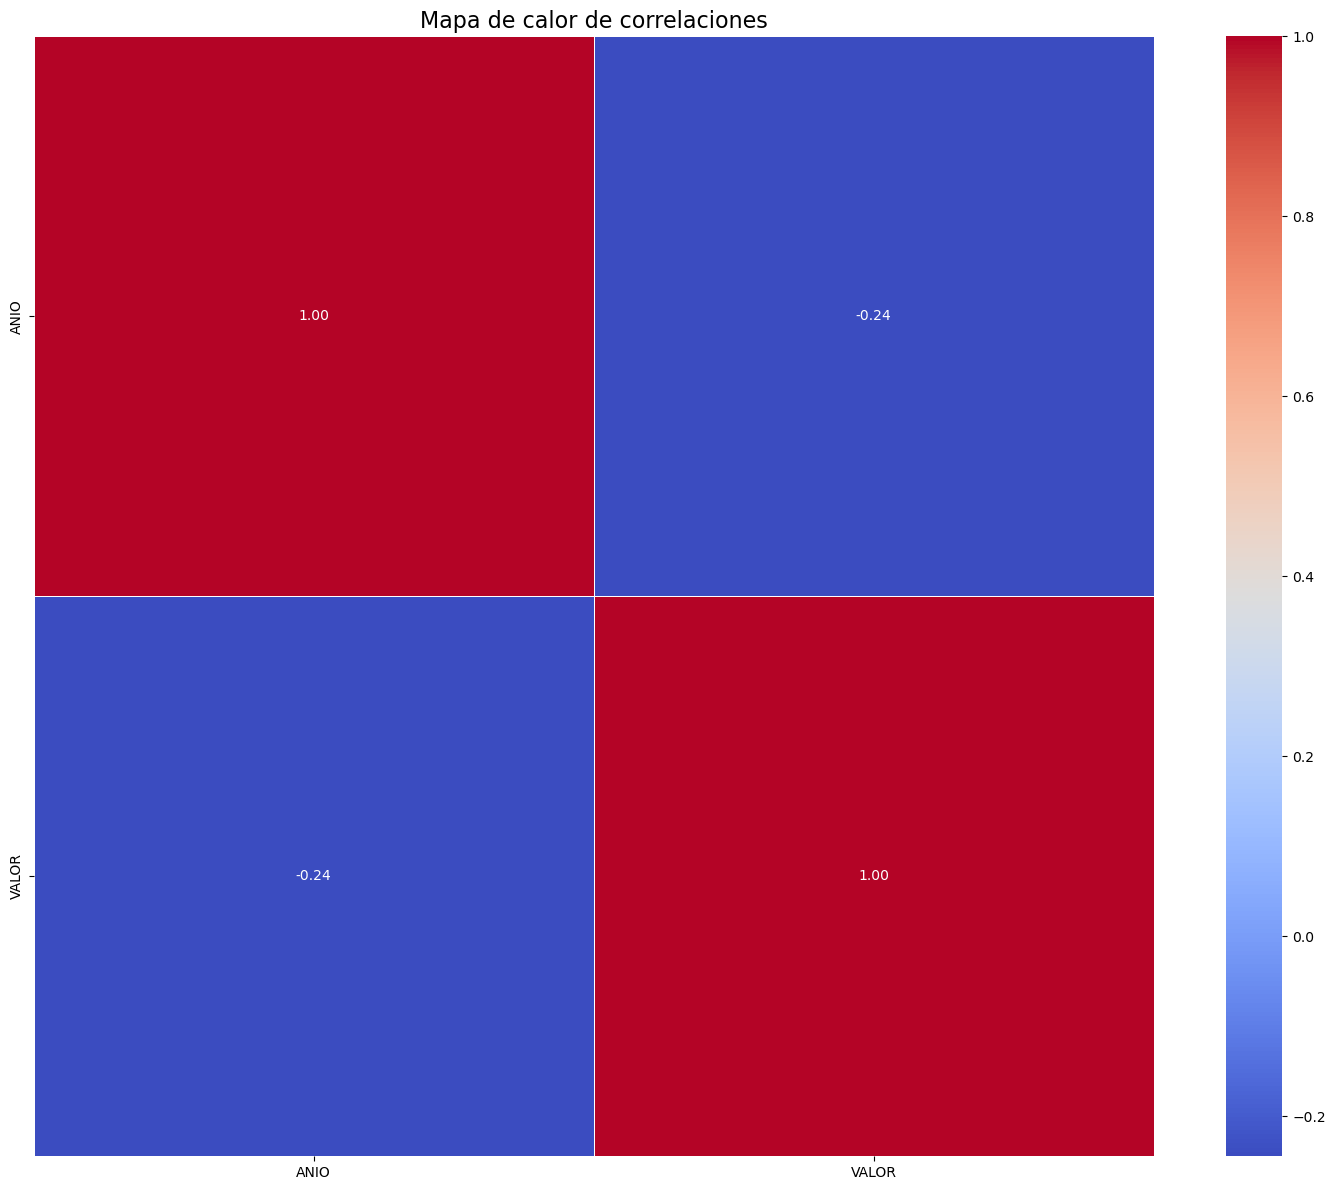

In [23]:
# matriz de correlación
corr_matrix = df[numerics].corr()

# Crear el mapa de calor
plt.figure(figsize=(15, 12))  # Tamaño de la figura
sns.heatmap(corr_matrix,
            annot=True,      # Mostrar los valores dentro de las celdas
            fmt=".2f",       # Formato de los números
            cmap="coolwarm", # Paleta de colores
            cbar=True,       # Mostrar barra de colores
            square=True,     # Celdas cuadradas
            linewidths=0.5)  # Líneas entre celdas
plt.title('Mapa de calor de correlaciones', fontsize=16)
plt.tight_layout()  # Ajustar márgenes
plt.show()

In [24]:
# Guardar como archivo Excel
#df.to_excel("transporte_definitivo.xlsx", index=False)

In [25]:
df

,ANIO,TRANSPORTE,VARIABLE,VALOR,MES,ENTIDAD,MUNICIPIO
0,1986,Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes,4201.0,Enero,Ciudad de México,Ciudad de México
1,1986,Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo,2601.0,Enero,Ciudad de México,Ciudad de México
2,1986,Red de Transporte de Pasajeros,Kilómetros recorridos,27199400.0,Enero,Ciudad de México,Ciudad de México
3,1986,Red de Transporte de Pasajeros,Pasajeros transportados,172000400.0,Enero,Ciudad de México,Ciudad de México
5,1986,Red de Transporte de Pasajeros,Rutas,219.0,Enero,Ciudad de México,Ciudad de México
...,...,...,...,...,...,...,...
29731,2025,Qrobús,Autobuses en operación de lunes a viernes,960.0,Marzo,Querétaro,Querétaro
29732,2025,Qrobús,Autobuses en operación de sábado a domingo,781.0,Marzo,Querétaro,Querétaro
29733,2025,Qrobús,Kilómetros recorridos,213581.0,Marzo,Querétaro,Querétaro
29734,2025,Qrobús,Pasajeros transportados,497095.0,Marzo,Querétaro,Querétaro
